In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import glob
import pickle

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
def new_fig(size, ncols=1, nrows=1, show_spines=True):
    '''
    size - [widthXheight] in cm
    '''
    
    cm = 1/2.54
    f, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(np.array(size)*cm))
    if not show_spines:
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
    matplotlib.rc('font', **{'family':'sans-serif','sans-serif':['Arial']})
    
    return f, ax


def save_fig(filepath, fig=None):
    
    fig = plt.gcf() if fig is None else fig
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    fig.savefig(filepath + '.pdf', transparent=True, dpi=300, bbox_inches='tight')
    fig.savefig(filepath + '.jpg', transparent=True, dpi=300, bbox_inches='tight')

In [3]:
def calculate_sampling_distribution(pop_measures, sample_size, N_boots=1000, func=np.mean):
    '''
        pop_measures - list of population measurements, each in size [#simulations X #vars]
    '''
    
    res = [[] for i in range(len(pop_measures))]
    for i in range(N_boots):
        sample_idx = np.random.choice(len(pop_measures[0]), size=sample_size)
        for j, pop_measure in enumerate(pop_measures):
            res[j].append(func(pop_measure[sample_idx], axis=0))
    
    return [np.array(a) for a in res]


def aggregate_by_field(dir_path, field, index=None):
    '''
        field - can be a single string indicating the field name or a list in length 2 to indicate the nested fields
    '''
    
    res_files = glob.glob(f'{dir_path}/*')
    res = []
    for file in res_files:
        with open(file, 'rb') as f:
            data = pickle.load(f)
        if len(field) == 1:
            if index is None:
                res.append(data[field[0]])
            else:
                res.append(data[field[0]][index])
        else:
            if index is None:
                res.append(data[field[0]][field[1]])
            else:
                res.append(data[field[0]][field[1]][index])
    return np.array(res)

In [4]:
filepaths = [
    'freqs360in4years_base20_amp28', # bipolar
    'freqs360in4years_base10_amp16', # control
]
inputs = np.array([aggregate_by_field(f'../results/continuous_noisy_input/{filepath}', ['u']) for filepath in filepaths])
corts = np.array([aggregate_by_field(f'../results/continuous_noisy_input/{filepath}', ['sol', 'y'], index=2) for filepath in filepaths])

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


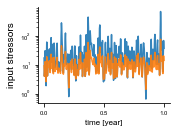

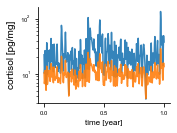

In [5]:
for tmp, name in zip([inputs, corts], ['input stressors', 'cortisol [pg/mg]']):
    f, ax = new_fig((6, 6/4*3), show_spines=False)
    plt.plot(np.linspace(0, 1, 360), tmp[0][0][-360:], lw=1.5, alpha=0.9)
    plt.plot(np.linspace(0, 1, 360), tmp[1][0][-360:], lw=1.5, alpha=0.9)
    plt.yscale('log')
    plt.xlabel('time [year]', size=8)
    plt.ylabel(name)
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
    name_to_save = name.replace(' [pg/mg]', '')
    save_fig(f'../results/simulated {name_to_save} control vs bipolar with glands')

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


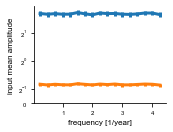

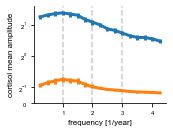

In [6]:
n_to_analyze = 4*360
N = inputs[:, :, -n_to_analyze:].shape[2]
input_fft = 2/N*np.abs(np.fft.rfft(inputs[:, :, -n_to_analyze:], axis=2))
cort_fft = 2/N*np.abs(np.fft.rfft(corts[:, :, -n_to_analyze:], axis=2))
freqs = np.fft.rfftfreq(n=N, d=1/360)

freqs_idx = (freqs > 0) & (freqs < 4.5)
for fft, name in zip([input_fft, cort_fft], ['input', 'cortisol']):
    f, ax = new_fig((6, 6/4*3), show_spines=False)
    if name == 'cortisol':
        for i in range(1,4):
            plt.axvline(i, alpha=0.4, ls='--', color='gray')
    
    for tmp in fft:
        sampling_dist = calculate_sampling_distribution([tmp], sample_size=59, func=np.mean, N_boots=1000)[0]
        plt.errorbar(
            freqs[freqs_idx],
            np.mean(sampling_dist, axis=0)[freqs_idx],
            yerr=np.std(sampling_dist, axis=0)[freqs_idx],
            lw=3,
            elinewidth=3,
        )
    
    plt.yscale('symlog', base=2, linthresh=0.5, linscale=0.25)
    plt.yticks([0, 0.5, 1, 2], fontsize=6)
    plt.xticks(np.arange(1, 5), fontsize=6)
    plt.xlabel('frequency [1/year]', size=8)
    plt.ylabel(f'{name} mean amplitude', size=8)
    save_fig(f'../results/simulated {name} spectrum control vs bipolar with glands')

In [7]:
filepaths = [
    'freqs360in4years_base20_amp28_noglands', # bipolar
    'freqs360in4years_base10_amp16_noglands', # control
]
inputs = np.array([aggregate_by_field(f'../results/continuous_noisy_input/{filepath}', ['u']) for filepath in filepaths])
corts = np.array([aggregate_by_field(f'../results/continuous_noisy_input/{filepath}', ['sol', 'y'], index=2) for filepath in filepaths])

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


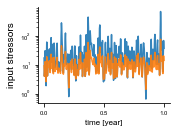

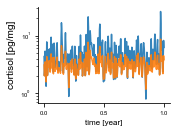

In [8]:
for tmp, name in zip([inputs, corts], ['input stressors', 'cortisol [pg/mg]']):
    f, ax = new_fig((6, 6/4*3), show_spines=False)
    plt.plot(np.linspace(0, 1, 360), tmp[0][0][-360:], lw=1.5, alpha=0.9)
    plt.plot(np.linspace(0, 1, 360), tmp[1][0][-360:], lw=1.5, alpha=0.9)
    plt.yscale('log')
    plt.xlabel('time [year]', size=8)
    plt.ylabel(name)
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
    name_to_save = name.replace(' [pg/mg]', '')
    save_fig(f'../results/simulated {name_to_save} control vs bipolar no glands')

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


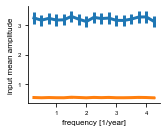

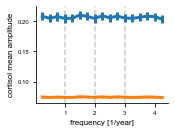

In [9]:
n_to_analyze = 4*360
N = inputs[:, :, -n_to_analyze:].shape[2]
input_fft = 2/N*np.abs(np.fft.rfft(inputs[:, :, -n_to_analyze:], axis=2))
cort_fft = 2/N*np.abs(np.fft.rfft(corts[:, :, -n_to_analyze:], axis=2))
freqs = np.fft.rfftfreq(n=N, d=1/360)

freqs_idx = (freqs > 0) & (freqs < 4.5)
for fft, name in zip([input_fft, cort_fft], ['input', 'cortisol']):
    f, ax = new_fig((6, 6/4*3), show_spines=False)
    if name == 'cortisol':
        for i in range(1,4):
            plt.axvline(i, alpha=0.4, ls='--', color='gray')
    
    for tmp in fft:
        sampling_dist = calculate_sampling_distribution([tmp], sample_size=59, func=np.mean, N_boots=1000)[0]
        plt.errorbar(
            freqs[freqs_idx],
            np.mean(sampling_dist, axis=0)[freqs_idx],
            yerr=np.std(sampling_dist, axis=0)[freqs_idx],
            lw=3,
            elinewidth=3,
        )
    
    # plt.yscale('symlog', base=2, linthresh=0.5, linscale=0.25)
    # plt.yticks([0, 0.5, 1, 2], fontsize=6)
    plt.yticks(fontsize=6)
    plt.xticks(np.arange(1, 5), fontsize=6)
    plt.xlabel('frequency [1/year]', size=8)
    plt.ylabel(f'{name} mean amplitude', size=8)
    save_fig(f'../results/simulated {name} spectrum control vs bipolar no glands')